<a href="https://colab.research.google.com/github/M-A-Lopa/Neural-Network/blob/main/Various_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/homeprices.csv")
df.sample(5)

,area,bedrooms,price
13,1100,2,40.0
5,1170,2,38.0
2,1440,3,62.0
9,3700,5,167.0
10,1800,3,82.0


In [ ]:
df.shape

(20, 3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
#sx = preprocessing.MinMaxScaler()
#sy = preprocessing.MinMaxScaler()

scalerx = MinMaxScaler()
scalery = MinMaxScaler()

#scaler.fit(X_train)--> scaled after spliting the dataset
#X_train_scaled = scaler.transform(X_train)

#scaling before spliting the datset
scaled_X = scalerx.fit_transform(df.drop('price',axis='columns'))
scaled_y = scalery.fit_transform(df['price'].values.reshape(df.shape[0],1))
#fit_transform method of MinMaxScaler requires a 2D array as input,
#but the df['price'].values returns a 1D array.
#To fix this, we need to reshape the price column into a 2D array using reshape


In [ ]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
np.ones(shape= 2)

array([1., 1.])

# Converting the target column --> price into 1D array from 2D array as it became 2D due to scaling  

In [ ]:
scaled_y.reshape(20,)
#The shape (20,) is a tuple with one element
#this is the standard way to define a 1D array of 20 elements in NumPy

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [ ]:
scaled_X.shape
#Here, 20 --> num of samples
#And 2 is the num of features --> area	bedrooms

(20, 2)

In [ ]:
scaled_X.T.shape

(2, 20)

In [ ]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

Formula of MSE = (1/n) ∑(𝑦-𝑦_predicted)^2



Weight Gradient
𝑑𝐿/𝑑𝑤 = −(2/𝑛)* (𝑦-𝑦_predicted)*𝑋.𝑇



Bias Gradient
𝑑𝐿/𝑑b = −(2/𝑛)∑(𝑦-𝑦_predicted)



Multiplied by(−2/n) as part of derivative of MSE


Derivation of MSE-->


d(𝑦-𝑦_predicted)^2/d(y_predicted) = −2(y− y_predicted)




In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    #X: Feature matrix (shape: n_samples × n_features)
    number_of_features = X.shape[1]#store NUM OF COL = 2(num of feature)

    w = np.ones(shape=(number_of_features)) #if 2 features, w = [1.0, 1.0]
    b = 0
    total_samples = X.shape[0] # number of rows = 20 in scaled_x

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b#doing matrix multiplication --> will give one col
        #w = (1,2), X.T = (2, 20) here, w's col = X.T's row
        #we have two feature, bedroom, area, then our formula is  w1 *area + w2*bedroom + bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # Calculating MSE

        if i%10==0:#For every 10 epochs, stores the current cost and epoch number.
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

In [ ]:
#Y_Prediction
import numpy as np

X = np.array([[2, 1],
              [4, 3],
              [5, 2]])   # 3 samples, 2 features

w = np.array([1, 2])       # weights for area and bedrooms
b = 0.5                    # bias term

y_predicted = np.dot(w, X.T) + b
print(y_predicted)


[ 4.5 10.5  9.5]


In [ ]:
#weight gradient
y_true = np.array([5, 11, 9])    # true target values
y_predicted = np.array([4.5, 10.5, 9.5])   # from previous step
total_samples = 3

error = y_true - y_predicted     # [0.5, 0.5, -0.5]

w_grad = -(2/total_samples) * (X.T.dot(error))
print(w_grad)

[-0.33333333 -0.66666667]


# **Epoch vs Cost**

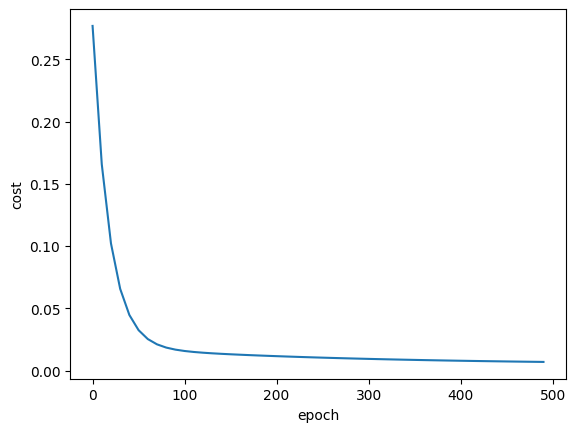

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_X = scalerx.transform([[area, bedrooms]])[0]
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    #once we get price prediction we need to to rescale it back to original value
    #This line converts the scaled price back to the original scale, so it's in real-world units -->taka.
    #since it returns 2D array, to get single value we need to do value[0][0]
    return scalery.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(385.7931034482758)

In [ ]:
# Training data
exam_x_train = [[2000, 3], [2500, 4], [3000, 5]]
exam_y_train = [[4000000], [5000000], [6000000]]

#---> after scaling (using minmax), we get-->
exam_x_scaled = [[0.0, 0.0], [0.5, 0.5], [1.0, 1.0]]
exam_y_scaled = [[0.0], [0.5], [1.0]]

# ---> Predict using scaled inputs
#scaled_X_test = scalerx.transform([[2600, 4]])  # e.g., returns [0.6, 0.5]
#scaled_price = model.predict([scaled_X_test[0]])  # e.g., returns [0.6]-->gives val of y_predicted
#but predicted_price = scalery.inverse_transform([[0.6]])[0][0] # returns 5400000.0

In [ ]:
scaled_price = 0.76
print(scalery.inverse_transform([[scaled_price]]))
#inverse_transform always return a 2d array
#so it will give a 2d array instead of a float val(which is expecte as price can not be 2d array , it can be either int or float)
#if we use [0][0]
print("After using [0][0]")
print(scalery.inverse_transform([[scaled_price]])[0][0])# we get a float value not 2d array

[[134.6]]
After using [0][0]
134.6


# **Stochastic Gradient Descent**

In [ ]:
#use random libary to pick random training sample
import random
random.randint(0,6)
#to generate random number between two numbers specified in the argument

1

In [ ]:
scaled_X.shape
#Here, 20 --> num of samples
#And 2 is the num of features --> area	bedrooms

(20, 2)

In [ ]:
def SGD(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # total_sample - 1 is inclusive
        sample_x = X[random_index]# stores only one row of x as in SGD we only use one sample per epoch
        sample_y = y_true[random_index]# stores that row's y as in SGD we only use one sample per epoch


        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71132082, 0.67795471]),
 np.float64(-0.2335038669696325),
 np.float64(0.0003857581874864548))

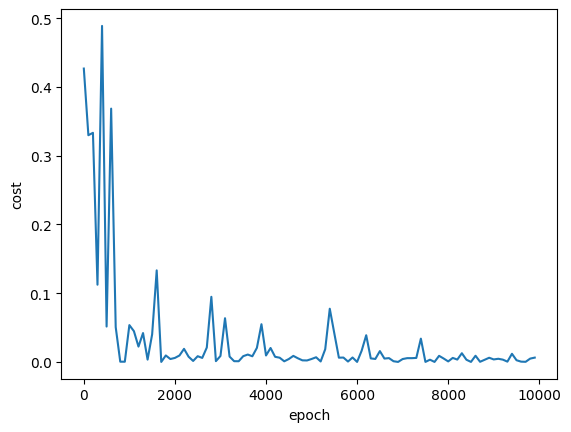

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

# **Mini Batch Gradient Descent**

In [ ]:
import random
num_smaple = scaled_X.shape[0]
start = random.randint(0,num_smaple//2)
end = random.randint(num_smaple//2+1,num_smaple-1)
print(start)
print(end)

0
19


In [ ]:
scaled_X.shape

(20, 2)

In [ ]:
def MBGD(X, y_true, epochs, learning_rate = 0.01, batch_size = 5):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        start = random.randint(0,num_smaple - batch_size)
        end = start + batch_size
        sample_x = X[start:end]# stores only one row of x as in SGD we only use one sample per epoch
        sample_y = y_true[start:end]# stores that row's y as in SGD we only use one sample per epoch

        if sample_x.shape[0] != batch_size or sample_y.shape[0] != batch_size:
            continue  # skip this iteration

        y_predicted = np.dot(sample_x, w) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y-y_predicted))

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = MBGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_mbgd, b_mbgd, cost_mbgd

(array([0.69480069, 0.55226083]),
 np.float64(-0.16209535898926936),
 np.float64(0.004753090771829691))

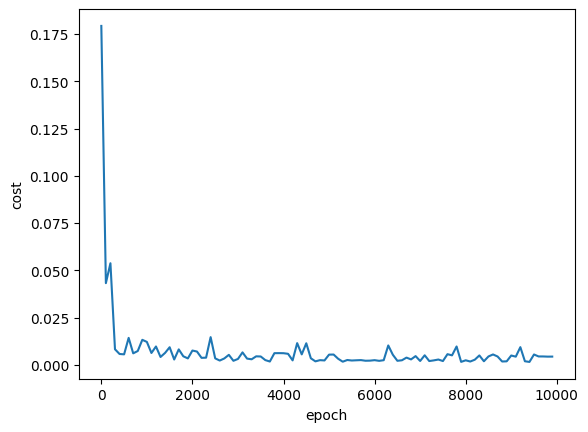

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd,cost_list_mbgd)

# **Another version(Better one)**

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    #batch_size --> solve a few problems at a time (e.g., 5 or 10)
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71027322, 0.67823095]),
 np.float64(-0.23332434663180385),
 np.float64(0.012792981147643604))

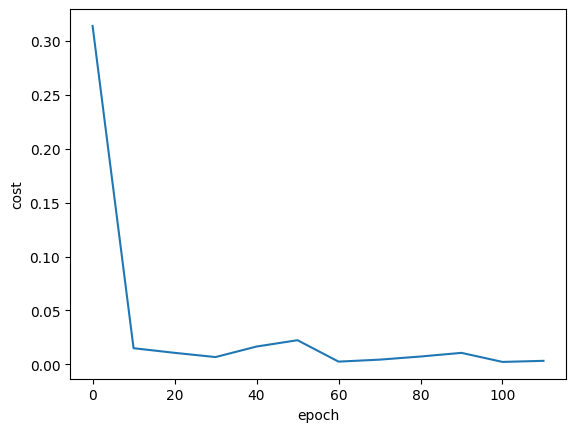

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)